In [8]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [4]:
path_before = '../data/przed_operacja/out_nerka_Moving2_SPLINE.mhd'
path_after = '../data/po/out_nerka_Moving2_SPLINE.mhd'

image_before = sitk.ReadImage(path_before, sitk.sitkFloat32)
image_after = sitk.ReadImage(path_after, sitk.sitkFloat32)

In [5]:
path_seg_before = '../data/przed_operacja/TOTAL.mhd'
path_seg_after = '../data/po/TOTAL.mhd'

seg_before = sitk.ReadImage(path_seg_before, sitk.sitkFloat32)
seg_after = sitk.ReadImage(path_seg_after, sitk.sitkFloat32)

In [3]:
viewer = sitk.ImageViewer()
# ! this is for MacOS only, change it for your OS
command = '/Applications/Slicer.app/Contents/MacOS/Slicer'
viewer.SetCommand(command)

### Breakdown before operation

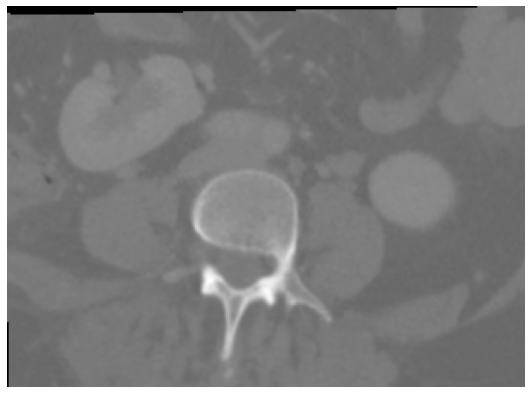

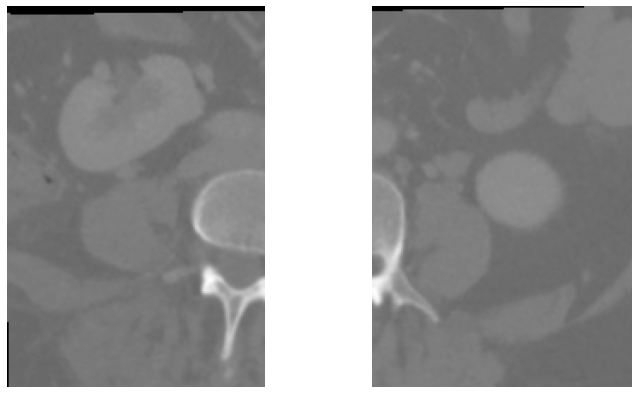

In [47]:
before_arr = sitk.GetArrayFromImage(image_before)
plt.figure(figsize=(12,7))
plt.imshow(before_arr[70], cmap='gray')
plt.axis('off')
plt.show()

half = before_arr.shape[2] // 2

left_before = before_arr[:,:,:half]
right_before = before_arr[:,:,half:]

seg_before_arr = sitk.GetArrayFromImage(seg_before)
left_seg_before = seg_before_arr[:,:,:half]
right_seg_before = seg_before_arr[:,:,half:]

plot, ax = plt.subplots(1, 2, figsize=(12, 7))

ax[0].imshow(left_before[70], cmap='gray')
ax[0].axis('off')
ax[1].imshow(right_before[70], cmap='gray')
ax[1].axis('off')
plt.show()

#### Voxel method (based on segmentation)

In [50]:
def voxels_volume(sitk_image, seg_slices):
    voxels = 0
    voxel_volume = 1

    for spacing in sitk_image.GetSpacing():
        voxel_volume *= spacing
    print(seg_slices.shape)
    for seg_slice in seg_slices:
        # 1 stands for kindey
        values, counts = np.unique(seg_slice, return_counts=True)
        val_dict = dict(zip(values, counts))
        
        try:
            voxels +=  val_dict[1]
        except KeyError:
            pass
    
    volume = voxels * voxel_volume
    return volume


In [51]:
voxels_volume(image_before, left_seg_before)

(167, 303, 151)
{0.0: 45753}
{0.0: 45753}
{0.0: 45753}
{0.0: 45753}
{0.0: 45753}
{0.0: 45753}
{0.0: 45753}
{0.0: 45753}
{0.0: 45686, 1.0: 67}
{0.0: 45359, 1.0: 394}
{0.0: 45096, 1.0: 653, 2.0: 4}
{0.0: 44783, 1.0: 962, 2.0: 8}
{0.0: 44546, 1.0: 1198, 2.0: 9}
{0.0: 44322, 1.0: 1415, 2.0: 16}
{0.0: 44106, 1.0: 1618, 2.0: 29}
{0.0: 43875, 1.0: 1832, 2.0: 46}
{0.0: 43642, 1.0: 2031, 2.0: 80}
{0.0: 43295, 1.0: 2269, 2.0: 117, 3.0: 72}
{0.0: 43025, 1.0: 2465, 2.0: 148, 3.0: 115}
{0.0: 42767, 1.0: 2566, 2.0: 226, 3.0: 194}
{0.0: 42530, 1.0: 2693, 2.0: 285, 3.0: 245}
{0.0: 42352, 1.0: 2799, 2.0: 329, 3.0: 273}
{0.0: 42242, 1.0: 2889, 2.0: 361, 3.0: 261}
{0.0: 42110, 1.0: 2996, 2.0: 385, 3.0: 262}
{0.0: 42005, 1.0: 3115, 2.0: 387, 3.0: 246}
{0.0: 41931, 1.0: 3165, 2.0: 422, 3.0: 235}
{0.0: 41872, 1.0: 3183, 2.0: 462, 3.0: 236}
{0.0: 41823, 1.0: 3232, 2.0: 458, 3.0: 240}
{0.0: 41752, 1.0: 3324, 2.0: 424, 3.0: 253}
{0.0: 41719, 1.0: 3296, 2.0: 475, 3.0: 263}
{0.0: 41686, 1.0: 3230, 2.0: 566, 3.0:

281403.2657975463